# Sheet 4 Exercise 1: Linear Dynamical System (Credits: 6)
Note: The notebook contains all problems parts of the first exercise. Please create the plots that are asked for in the notebook and type out the corresponding interpretations. All computations are supposed to be carried out by hand! You need to submit your computations to complete the exercise. You can either write your computations into the notebook using LaTeX syntax, or submit them on paper (scan).

Assume a linear dynamical system of the form $\dot{x}(t) = Ax(t)$ with
$$
A =
\begin{pmatrix}
-0.5 & -0.5 & 0 \\
-0.5 & -0.5 & 0 \\
0 & 0 & 2
\end{pmatrix}.
$$

#### 1.1 
Compute the eigenvalues and eigenvectors of $A$.

#### 1.2
Compute and plot the solution of the system for the initial conditions
$$
x_{0,1} = \begin{pmatrix} 1\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,2} = \begin{pmatrix} 1\\0\\0 \end{pmatrix}, \hspace{.5em}
x_{0,3} = \begin{pmatrix} 0\\1\\0 \end{pmatrix}, \hspace{.5em}
x_{0,4} = \begin{pmatrix} 0\\0\\10^{-6} \end{pmatrix}.
$$
Explain the behaviour observed in your plot using the eigenvalues and eigenvectors found in 1.1.

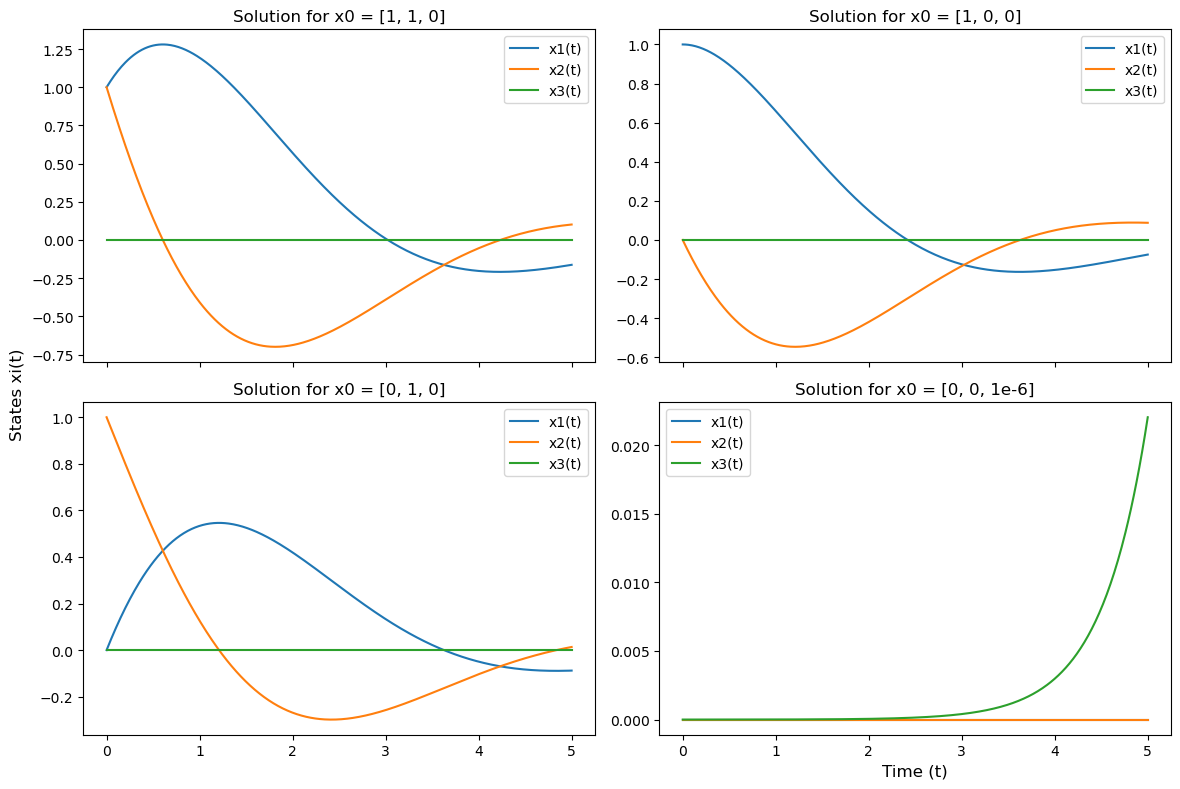

In [1]:
import numpy as np
import matplotlib.pyplot as plt
### CODE FOR YOUR PLOT HERE ###

from scipy.linalg import expm

# matrix A
A = np.array([[0, 1, 0],
              [-1, -1, 0],
              [0, 0, 2]])

# Time vector
t_values = np.linspace(0, 5, 500)

# Initial conditions
initial_conditions = [
    np.array([1, 1, 0]),
    np.array([1, 0, 0]),
    np.array([0, 1, 0]),
    np.array([0, 0, 1e-6])
]

# solutions for each initial condition
solutions = []
for x0 in initial_conditions:
    solution = np.array([np.dot(expm(A * t), x0) for t in t_values])
    solutions.append(solution)

# Plotting 
labels = [
    "x0 = [1, 1, 0]",
    "x0 = [1, 0, 0]",
    "x0 = [0, 1, 0]",
    "x0 = [0, 0, 1e-6]"
]

# a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()  

for i, solution in enumerate(solutions):
    axes[i].plot(t_values, solution[:, 0], label="x1(t)")
    axes[i].plot(t_values, solution[:, 1], label="x2(t)")
    axes[i].plot(t_values, solution[:, 2], label="x3(t)")
    axes[i].set_title(f"Solution for {labels[i]}", fontsize=12)
    axes[i].legend(loc="best", fontsize=10)
    axes[i].grid(False)

axes[-1].set_xlabel("Time (t)", fontsize=12)
fig.supylabel("States xi(t)", fontsize=12)
plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOT HERE ###

**Explanation:** 
<div class="alert alert-block alert-info"> 
    Please see attached PDF for the explanation after the mathematical solution.
</div>

#### 1.3
Plot the vector field of the dynamical system as a quiver plot in the three projection planes defined respectively by
1. $x_3 = 0$,
2. $x_2 = 0$,
3. $x_1 = 0$.

Explain the solutions observed in 1.2 using the quiver plots.

*Hint:* Matplotlib has a built-in function for quiver plots. An explanation of how it works can be found here: https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/. For a given plane, take vectors $x$ from the plane and project the corresponding $\dot{x}$ into the plane.

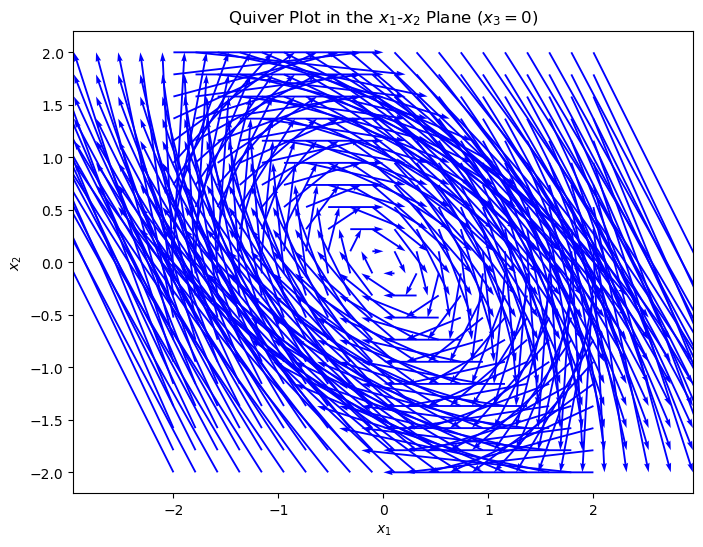

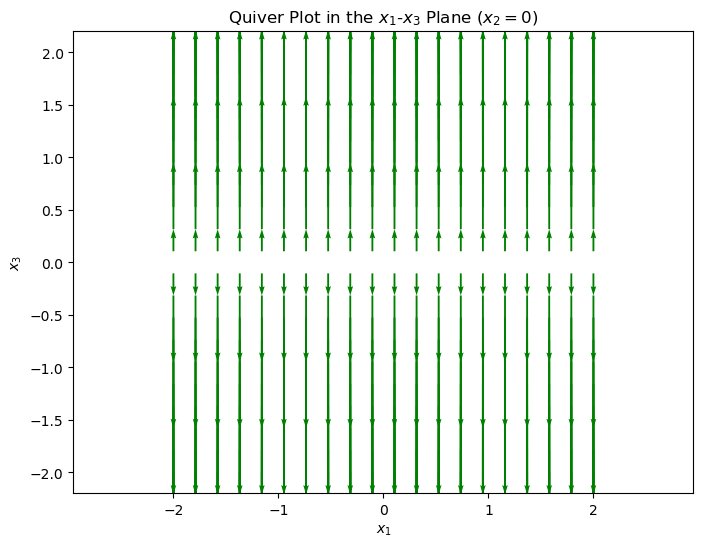

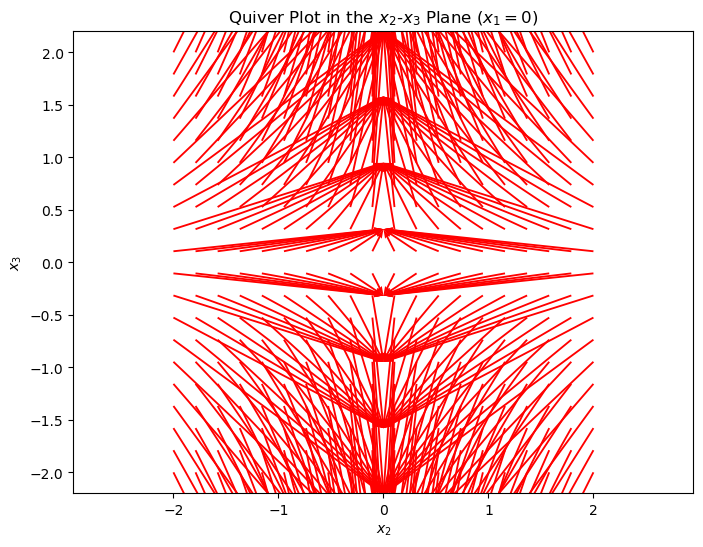

In [2]:
### CODE FOR YOUR PLOTS HERE ###
# Define the system matrix A
A = np.array([[0, 1, 0],
              [-1, -1, 0],
              [0, 0, 2]])

# Define the grid limits
x_range = np.linspace(-2, 2, 20)
y_range = np.linspace(-2, 2, 20)

# Function to compute dx/dt = Ax
def vector_field(x):
    return A @ x

# Quiver plot for x3 = 0 (Projection onto x1-x2 plane)
x1, x2 = np.meshgrid(x_range, y_range)
x3 = np.zeros_like(x1)
points = np.stack([x1.ravel(), x2.ravel(), x3.ravel()], axis=1)
dx = np.array([vector_field(p) for p in points])
u, v = dx[:, 0].reshape(x1.shape), dx[:, 1].reshape(x2.shape)  # Components in x1, x2
plt.figure(figsize=(8, 6))
plt.quiver(x1, x2, u, v, color='blue', angles='xy', scale_units='xy', scale=1)
plt.title("Quiver Plot in the $x_1$-$x_2$ Plane ($x_3 = 0$)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid(False)
plt.axis('equal')
plt.show()

# Quiver plot for x2 = 0 (Projection onto x1-x3 plane)
x1, x3 = np.meshgrid(x_range, y_range)
x2 = np.zeros_like(x1)
points = np.stack([x1.ravel(), x2.ravel(), x3.ravel()], axis=1)
dx = np.array([vector_field(p) for p in points])
u, w = dx[:, 0].reshape(x1.shape), dx[:, 2].reshape(x3.shape)  # Components in x1, x3
plt.figure(figsize=(8, 6))
plt.quiver(x1, x3, u, w, color='green', angles='xy', scale_units='xy', scale=1)
plt.title("Quiver Plot in the $x_1$-$x_3$ Plane ($x_2 = 0$)")
plt.xlabel("$x_1$")
plt.ylabel("$x_3$")
plt.grid(False)
plt.axis('equal')
plt.show()

# Quiver plot for x1 = 0 (Projection onto x2-x3 plane)
x2, x3 = np.meshgrid(x_range, y_range)
x1 = np.zeros_like(x2)
points = np.stack([x1.ravel(), x2.ravel(), x3.ravel()], axis=1)
dx = np.array([vector_field(p) for p in points])
v, w = dx[:, 1].reshape(x2.shape), dx[:, 2].reshape(x3.shape)  # Components in x2, x3
plt.figure(figsize=(8, 6))
plt.quiver(x2, x3, v, w, color='red', angles='xy', scale_units='xy', scale=1)
plt.title("Quiver Plot in the $x_2$-$x_3$ Plane ($x_1 = 0$)")
plt.xlabel("$x_2$")
plt.ylabel("$x_3$")
plt.grid(False)
plt.axis('equal')
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

<div class="alert alert-block alert-info"> 
    
1. **x3 = 0 Plane (x1-x2 Dynamics):**  
   - The vector field shows trajectories decaying towards the origin, influenced by eigenvalues λ1 = 0 and λ2 = -1.  
   - No exponential growth is observed since λ3 = 2 does not contribute in this plane.

2. **x2 = 0 Plane (x1-x3 Dynamics):**  
   - Along x3, trajectories exhibit exponential growth due to λ3 = 2.  
   - x1 remains constant along the λ1 = 0 direction.

3. **x1 = 0 Plane (x2-x3 Dynamics):**  
   - x2 decays to zero due to λ2 = -1.  
   - x3 grows exponentially due to λ3 = 2.
</div>

#### 1.4
Plot the vector field of the dynamics in the projection on the plane defined by
$$
e_1 = \frac{1}{\sqrt{2}}\begin{pmatrix} 1\\-1\\0 \end{pmatrix}, \hspace{.5em}
e_2 = \begin{pmatrix} 0\\0\\1 \end{pmatrix}.
$$
How can this result be explained?

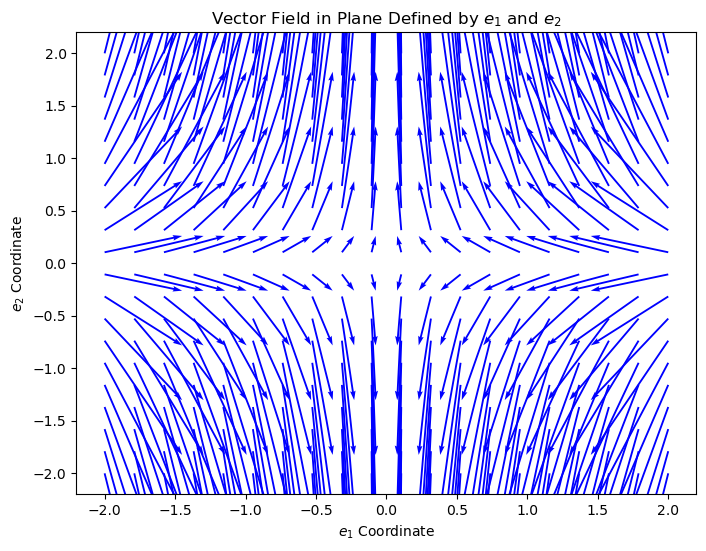

In [3]:
### CODE FOR YOUR PLOTS HERE ###
# Define the system matrix A
A = np.array([[0, 1, 0],
              [-1, -1, 0],
              [0, 0, 2]])

# Define the basis vectors e1 and e2
e1 = np.array([1/np.sqrt(2), -1/np.sqrt(2), 0])
e2 = np.array([0, 0, 1])

# Create the projection matrix P
P = np.column_stack((e1, e2))

# Projected system matrix on the plane
A_proj = P.T @ A @ P

# Define grid for e1-e2 plane
e1_vals = np.linspace(-2, 2, 20)
e2_vals = np.linspace(-2, 2, 20)
E1, E2 = np.meshgrid(e1_vals, e2_vals)

# Initialize the vector field
dE1 = np.zeros_like(E1)
dE2 = np.zeros_like(E2)

# Compute the vector field
for i in range(E1.shape[0]):
    for j in range(E1.shape[1]):
        y = np.array([E1[i, j], E2[i, j]])  # Point in plane
        dy = A_proj @ y                     # Dynamics in plane
        dE1[i, j] = dy[0]
        dE2[i, j] = dy[1]

# Plot the vector field
plt.figure(figsize=(8, 6))
plt.quiver(E1, E2, dE1, dE2, color="blue", scale=8)
plt.title("Vector Field in Plane Defined by $e_1$ and $e_2$")
plt.xlabel("$e_1$ Coordinate")
plt.ylabel("$e_2$ Coordinate")
plt.grid(False)
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

<div class="alert alert-block alert-info"> 
    
**Behavior in the Plane:**
- \( e_1 \) combines \( x_1 \) and \( x_2 \), influenced by \( λ1 = 0 \) and \( λ2 = -1 \).
- \( e_2 \) corresponds to \( x_3 \), dominated by \( λ3 = 2 \).

**Key Observations:**
- Along \( e_2 \), the exponential growth due to \( λ3 = 2 \) dominates.
- Along \( e_1 \), the decay due to \( λ2 = -1 \) is observed.

Trajectories reflect the combined effect of decay in one direction and growth in the other, creating saddle-like behavior.
</div>

#### 1.5
Now consider a system with constant input, namely $\dot{x}(t) = Ax(t) + s(t)$ where A is as before and $s(t) = (1,2,0)^T$. Compute the solution for the initial condition $(0,0,0)^T$. Plot the solution projected onto the planes defined by

1. $x_3 = 0$,
2. the plane from 1.4.

What do you observe?

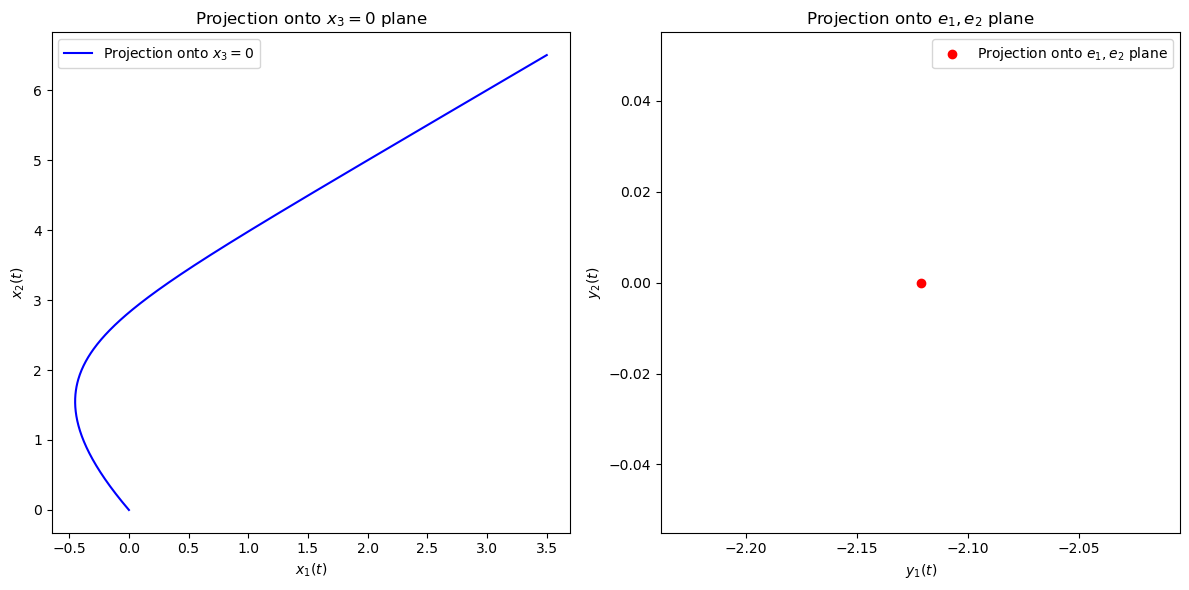

In [4]:
### CODE FOR YOUR PLOTS HERE ###

# Define the solution components for x1(t) and x2(t)
def x1(t):
    return 0.5 * (t - 3 + 3 * np.exp(-t))

def x2(t):
    return 0.5 * (t + 3 - 3 * np.exp(-t))

# Define time values for plotting
t_values = np.linspace(0, 10, 500)

# Compute x1(t) and x2(t) for each t
x1_values = x1(t_values)
x2_values = x2(t_values)

# Plot the projection onto the plane x3 = 0 (2D plot of x1(t) vs x2(t))
plt.figure(figsize=(12, 6))

# Plot for the plane x3 = 0
plt.subplot(1, 2, 1)
plt.plot(x1_values, x2_values, label=r'Projection onto $x_3=0$', color='blue')
plt.title('Projection onto $x_3=0$ plane')
plt.xlabel(r'$x_1(t)$')
plt.ylabel(r'$x_2(t)$')
plt.grid(False)
plt.legend()

# Plot for the plane defined by e1 and e2
# Since the projection is constant for this plane, we just plot a point
plt.subplot(1, 2, 2)
plt.scatter(-3/np.sqrt(2), 0, color='red', label=r'Projection onto $e_1, e_2$ plane')
plt.title('Projection onto $e_1, e_2$ plane')
plt.xlabel(r'$y_1(t)$')
plt.ylabel(r'$y_2(t)$')
plt.grid(False)
plt.legend()

plt.tight_layout()
plt.show()

### CODE FOR YOUR PLOTS HERE ###

**Explanation:** 

<div class="alert alert-block alert-info"> 
    
#### I observe two behaviors:

1. **Saddle-like Behavior**:  
   From the first plot, you can observe a saddle-like behavior due to the combination of exponential decay (from the negative eigenvalue \( λ = -1 \)) and exponential growth (from the positive eigenvalue \( λ = 2 \)).

2. **Constant Projection**:  
   The projection onto the plane defined by \( e_1 \) and \( e_2 \) indicates that while the system evolves in time in the \( x_1 \)-\( x_2 \) plane, the effect of the constant input forces the projection in this new basis to be stationary.

</div>
